## EDA

Set up

In [43]:
import pandas as pd 
import sqlalchemy
import missingno as msn 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

Data CSV

METADATOS MODELO PRELIMINAR - df_estates.csv

FECHA DE **EXTRACCIÓN MARTES 2 AGOSTO 2022**

Se extrajo toda la información de las tablas ESTATES ACMS PURCHASE_CASES hasta antes de la fecha dada. 

In [44]:
df = pd.read_csv('df_estates3.csv')
#DROP COLUMNS
df = df.drop(columns=['adjustSquareMeterPrice', 'automaticACMPrice', 'created_at', 'terraceValue',
                       'utilityRoomValue', 'preofferAcmHigherValue','preofferAcmLowerValue','buildingFloors','estateFloors',
                       'rentValue','garageType','terraceArea','zone','garageValue', 'type'])

In [45]:
df.shape

(18911, 12)

Missing plot

<AxesSubplot:>

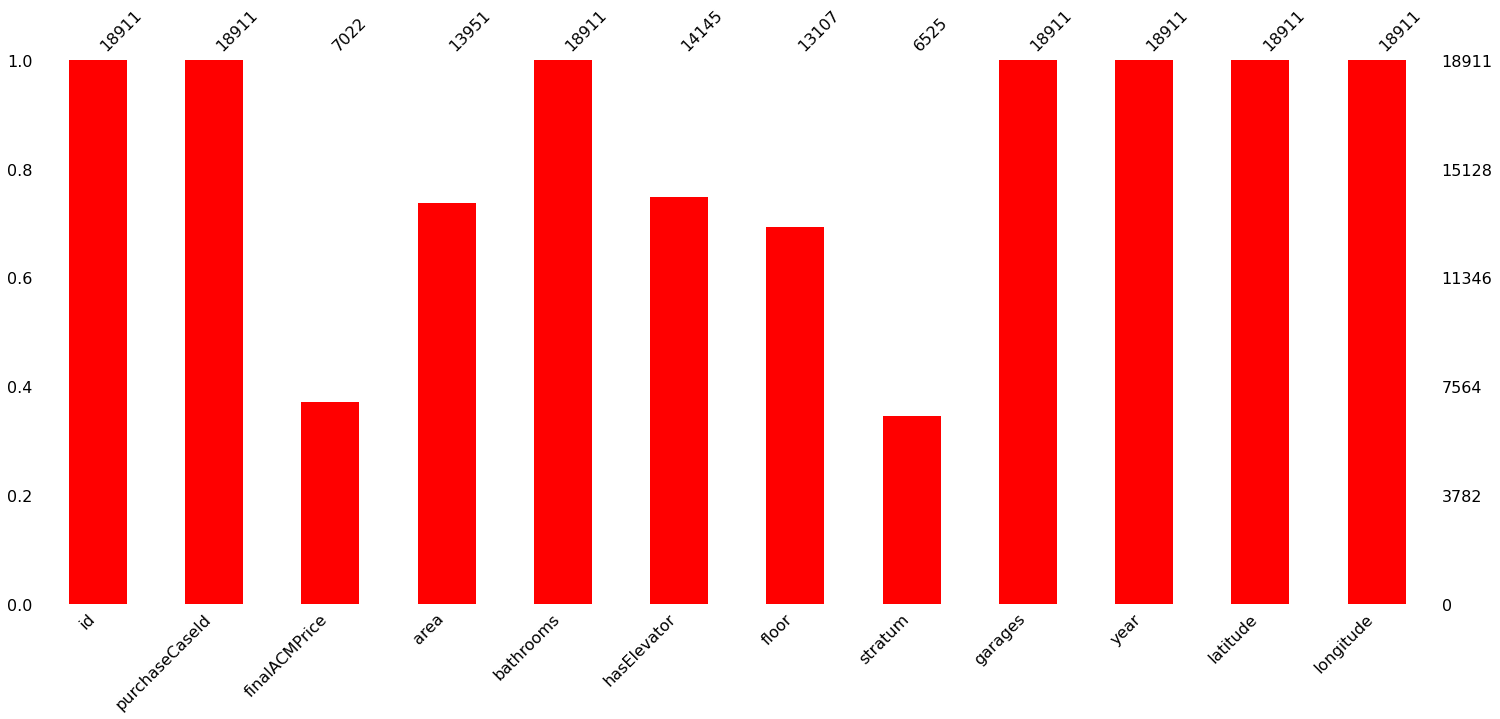

In [46]:
msn.bar(df, color = 'red')

Preprocesamiento de la información.

In [47]:
def preprocesamiento(df):
    #Drop rows with null values in Y variable
    df = df[df.finalACMPrice.notna()]
    #Calculate Antiguedad of a property in years
    df['Antiguedad'] = date.today().year - df['year']
    df['Antiguedad'] = df['Antiguedad'].astype(int)
    df = df.drop(columns=['id', 'purchaseCaseId', 'year'])
    #delete rows with null values in stratum variables
    df = df[df.stratum.notna()]
    #Turn floor to integer
    df = df[df.floor.notna()]
    df['floor'] = df['floor'].astype(int)
    #df = df[df.stratum.notna()]
    # Convert hasElevator to categorical
    df['hasElevator'] = df['hasElevator'].astype('category')
    return df

df = preprocesamiento(df)

C:\Users\User\AppData\Local\Temp\ipykernel_9324\1233199684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = date.today().year - df['year']
C:\Users\User\AppData\Local\Temp\ipykernel_9324\1233199684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Antiguedad'] = df['Antiguedad'].astype(int)


Plots describing some variables

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


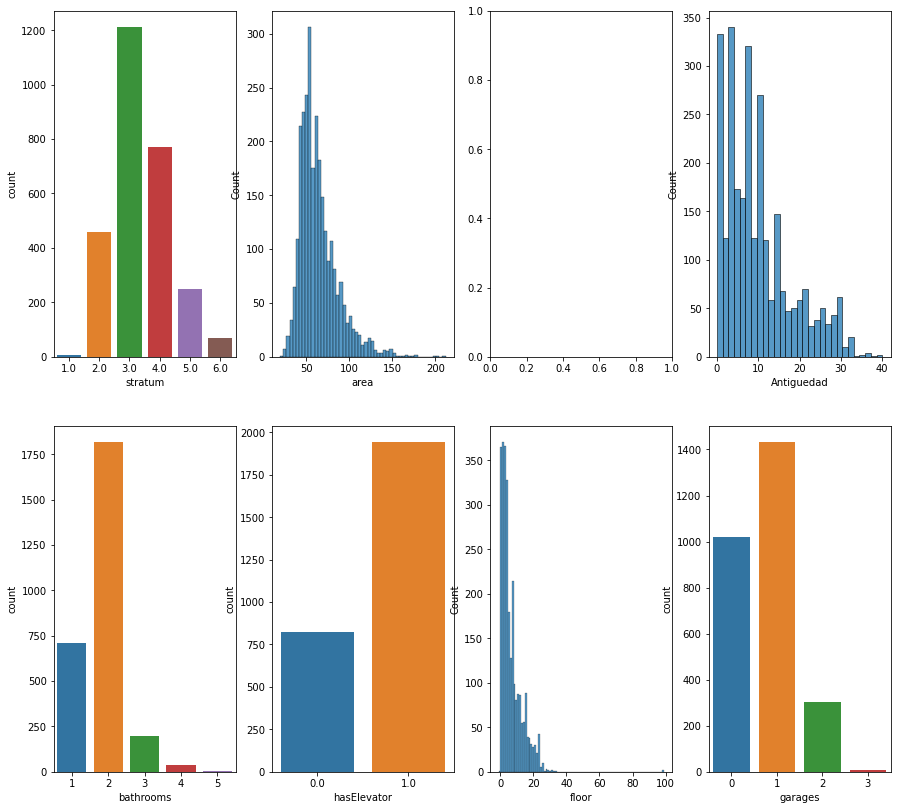



Response variable Y: 'finalACMPrice'


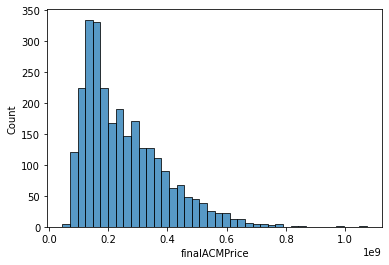

count    2.763000e+03
mean     2.550255e+08
std      1.371016e+08
min      4.528172e+07
25%      1.484662e+08
50%      2.213979e+08
75%      3.332263e+08
max      1.073428e+09
Name: finalACMPrice, dtype: float64




In [48]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(15, 14)

sns.countplot(x='stratum', data=df, ax=axs[0, 0])
sns.histplot(x='area', data=df, ax=axs[0, 1])
sns.histplot(x='Antiguedad', data=df, ax=axs[0, 3])
sns.countplot(x='bathrooms', data=df, ax=axs[1, 0])
sns.countplot(x='hasElevator', data=df,  ax=axs[1, 1])
sns.histplot(x='floor', data=df,  ax=axs[1, 2])
sns.countplot(x='garages', data=df, ax=axs[1, 3])

plt.show()
print('\n')


print("Response variable Y: 'finalACMPrice'")
sns.histplot(x='finalACMPrice', data=df)
plt.show()
print(df.finalACMPrice.describe())
print('\n')


In [49]:
df.dtypes

finalACMPrice     float64
area              float64
bathrooms           int64
hasElevator      category
floor               int32
stratum           float64
garages             int64
latitude          float64
longitude         float64
Antiguedad          int32
dtype: object

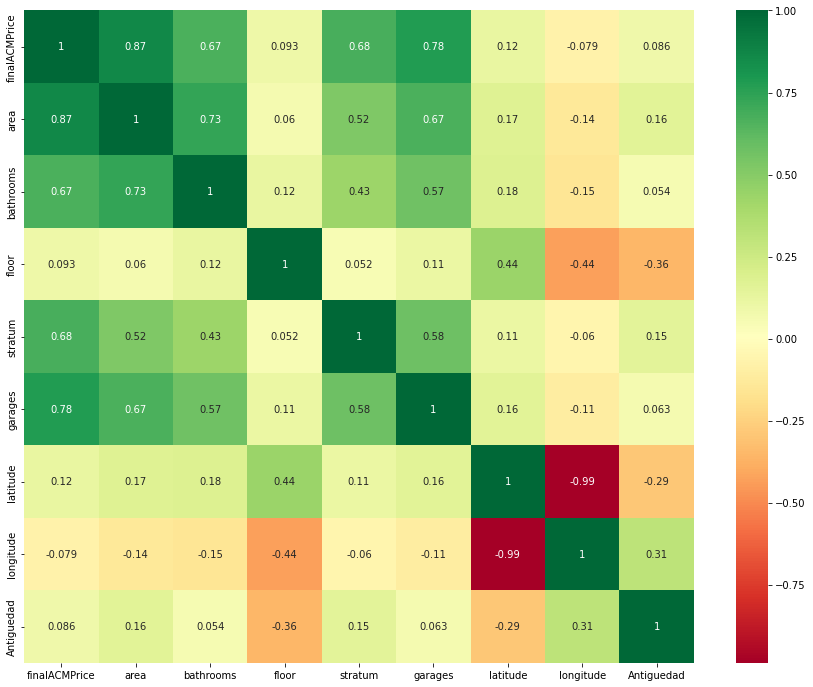

In [50]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

In [51]:
X = df.drop(columns=['finalACMPrice'])
y = df['finalACMPrice']

In [52]:
X.sample(10)

,area,bathrooms,hasElevator,floor,stratum,garages,latitude,longitude,Antiguedad
2318,60.0,2,1.0,4,4.0,1,6.345400,-75.533522,8
2670,132.0,2,1.0,7,6.0,1,6.200158,-75.575405,0
163,147.0,4,1.0,6,4.0,2,4.723059,-74.035842,16
3123,66.0,2,1.0,1,3.0,1,6.169147,-75.576637,13
2771,103.0,3,1.0,5,4.0,2,4.730690,-74.036863,12
15791,50.0,1,0.0,1,2.0,0,4.625808,-74.194135,11
1539,80.0,2,1.0,8,5.0,2,6.174132,-75.570643,8
1602,70.0,2,1.0,3,3.0,1,4.749476,-74.061430,10
6912,95.0,2,1.0,2,3.0,1,6.163953,-75.630773,7
17645,48.0,1,0.0,2,3.0,0,4.639349,-74.186202,6


### Particion de muestras para entrenamiento y prueba

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                 test_size=0.2,
                                                    random_state=42)

In [54]:
X_train

,area,bathrooms,hasElevator,floor,stratum,garages,latitude,longitude,Antiguedad
1254,51.0,2,1.0,9,3.0,1,6.132791,-75.635089,3
7676,65.0,2,1.0,3,3.0,1,6.165781,-75.594824,8
7853,57.0,2,1.0,14,3.0,1,4.586188,-74.161307,6
10686,54.0,2,1.0,7,2.0,1,4.741979,-74.057376,3
3949,59.0,2,1.0,24,4.0,1,6.320020,-75.567365,3
...,...,...,...,...,...,...,...,...,...
8632,83.0,3,1.0,1,3.0,1,4.643695,-74.085936,22
4208,78.0,2,1.0,8,4.0,1,6.249339,-75.593631,15
4318,48.0,1,1.0,6,3.0,1,4.620872,-74.211836,4
5051,106.0,2,0.0,3,5.0,2,4.691653,-74.062146,8


In [55]:
# haga un pca
from sklearn.decomposition import PCA

#pca
pca = PCA(n_components=2)
pca.fit(X_train)

#transformar
X_train_pca = pca.transform(X_train)



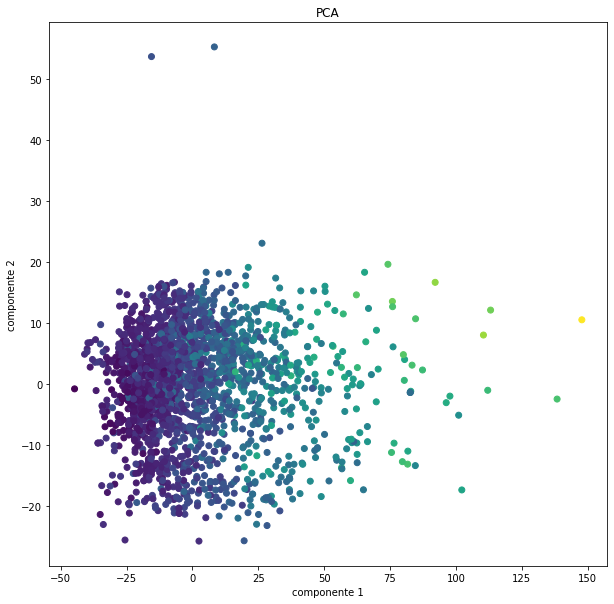

In [56]:
#plor 2 componentes
plt.figure(figsize=(10,10))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='viridis')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA')
plt.show()


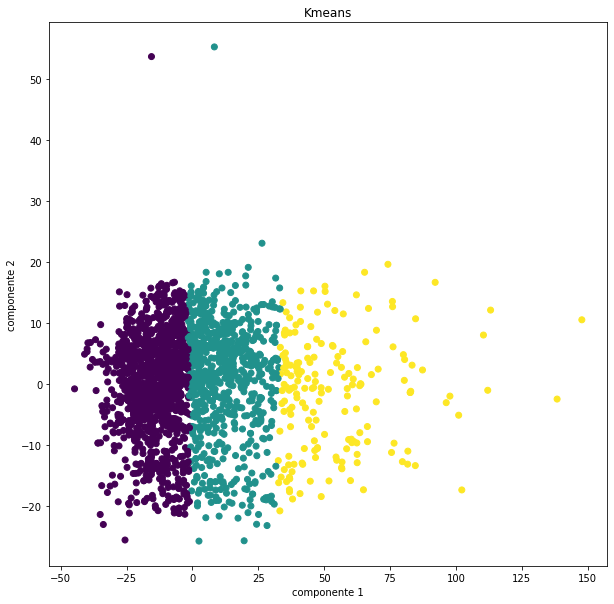

In [57]:
#apply kmeans to X_train
from sklearn.cluster import KMeans

#kmeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_pca)

#predicciones
y_pred = kmeans.predict(X_train_pca)

#plot
plt.figure(figsize=(10,10))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_pred, cmap='viridis')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('Kmeans')
plt.show()